# Knapsack Problem (High-Climbing)

In [7]:
from itertools import accumulate #used for generating cumulative sums of the list.
from icecream import ic #A debugging library to printvalues neatly
import numpy as np # A library for numerical operation
from tqdm.auto import tqdm # For displaying progress bars in loops
from matplotlib import pyplot as plt # For plotting the results.

c:\Users\anjal\Desktop\computational Interlligence\CI2024_lab1\CI2024_lab1\CI2024_lab1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
RANDOM_SEED = 42 # A random seed is set for reproducibility, ensuring the random numbers genertaed will be same each time we run the code.
np.random.seed(RANDOM_SEED)

MAX_STEPS = 5_000

In [9]:
instances = [
    {"universe_size": 100, "num_sets": 10, "density": 0.2},
    {"universe_size": 1000, "num_sets": 100, "density": 0.2},
    # {"universe_size": 10000, "num_sets": 1000, "density": 0.2},
    # {"universe_size": 100000, "num_sets": 10000, "density": 0.1},
    # {"universe_size": 100000, "num_sets": 10000, "density": 0.2},
    # {"universe_size": 100000, "num_sets": 10000, "density": 0.3},
]

In [10]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

sets = []
set_size = int(UNIVERSE_SIZE * DENSITY)
set_element = np.random.choice(UNIVERSE_SIZE, set_size, replace=False)
set_value = len(set_element)
set_weight = np.random.randint(1, 20)
sets.append((set_element, set_value, set_weight))



In [11]:
# knapsack : A binary array of length num_sets
# weights : A 2D array where each row representts the weight of esch item in different dimensions.
#max_weight:- maximum allowed weight
def evaluate(knapsack, weights, values, max_weights):
    if all(np.sum(weights[knapsack], axis=0) <= max_weights):
        return np.sum(values[knapsack])
    else:
        return -1

In [12]:
def knapsack_solution(instance):
    universe_size = instance["universe_size"]
    num_sets = instance["num_sets"]
    density = instance["density"]

    # Generate weights and values for items
    weights = np.random.randint(1, 50 + 1, size=(num_sets, universe_size))
    max_weights = np.full(universe_size, universe_size * density * 10)  # Adjusted max_weights based on density
    values = np.random.randint(1, 100 + 1, size=num_sets)

    # Initialize solution and history
    solution = np.full(num_sets, False)
    history = [evaluate(solution, weights, values, max_weights)]

    for n in tqdm(range(MAX_STEPS)):
        new_solution = solution.copy()
        index = np.random.randint(0, num_sets)
        new_solution[index] = not new_solution[index]

        new_value = evaluate(new_solution, weights, values, max_weights)
        history.append(new_value)
        if new_value > evaluate(solution, weights, values, max_weights):
            solution = new_solution

    return evaluate(solution, weights, values, max_weights), history

100%|██████████| 5000/5000 [00:00<00:00, 14683.95it/s]


Instance: {'universe_size': 100, 'num_sets': 10, 'density': 0.2}, Maximum Value: 218


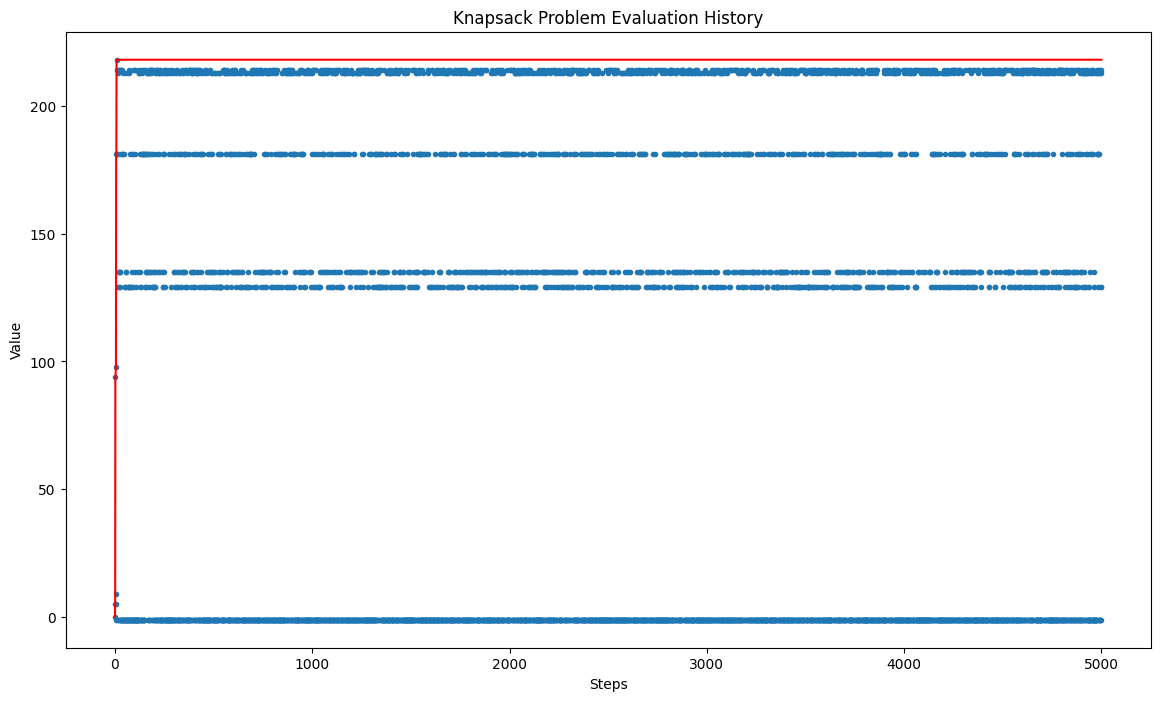

In [13]:
# check the code because i think there is an error in it
# Run the knapsack solution for each instance
results = []
for instance in instances:
    max_value, history = knapsack_solution(instance)
    results.append((instance, max_value))

# Display the results
for instance, max_value in results:
    print(f"Instance: {instance}, Maximum Value: {max_value}")

# Optional: Visualize the history for the last instance

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
plt.title('Knapsack Problem Evaluation History')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.show()